In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/house-price-prediction-seattle/train.csv')
test = pd.read_csv('/kaggle/input/house-price-prediction-seattle/test.csv')

First used linear regression but the score was too low tbh, so moved towards polynomial regression using degree 2, then normalized and used ridge and lasso regression to overall improve the score

# **PERFORM EDA**

In [4]:
train.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [5]:
test.describe()

,beds,baths,size,lot_size,zip_code,price
count,505.000000,505.000000,505.000000,428.000000,505.000000,5.050000e+02
mean,2.954455,2.219802,1851.843564,3994.459813,98125.366337,9.795822e+05
std,1.214947,1.013404,922.556090,2696.962024,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,0.230000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,1326.500000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,4190.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,6000.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,9974.000000,98199.000000,6.250000e+06


In [6]:
train.isnull().sum()  # THERE ARE NULL VALUES IN THE LOT_SIZE AND LOT_SIZE_UNITS COLUMNS


beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [7]:
test.isnull().sum()  # SIMILARLY IN THE TEST ONE

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

In [8]:
train.duplicated().sum()

9

In [9]:
test.duplicated().sum()

1

### SO NOW WE KNOW THAT THERE ARE DUPLICATE VALUES, THERE ARE NULL VALUES SO NOW WE HAVE TO CLEAN THE DATA
### BUT FIRST WE WILL CHECK IF THERE IS INCONSISTENCY IN UNITS.

In [10]:
train['lot_size_units'].unique()

array(['sqft', 'acre', nan], dtype=object)

In [11]:
test['lot_size_units'].unique()

array(['sqft', 'acre', nan], dtype=object)

#### SO YES NOW WE KNOW THAT THERE IS SOME SORT OF INCONSISTENCY AS SOME UNITS ARE IN ACRE INSTEAD OF SQFT.

In [12]:
mask = train['lot_size_units']=='acre'
train.loc[mask,'lot_size']*=43560
train.loc[mask,'lot_size_units']='sqft'

In [13]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [14]:
mask = test['lot_size_units']=='acre'
test.loc[mask,'lot_size']*=43560
test.loc[mask,'lot_size_units']='sqft'

In [15]:
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0


### NOW WE SHOULD DROP COLUMNS THAT ARE OF NO USE, AND AS WE KNOW THAT THE SIZE IS IN SQFT SO THERE IS NO NEED OF THAT COLUMN
### SIMILARLY ZIP_CODE COLUMN IS OF NO USE

In [16]:
# so i have removed these columns from train data

In [17]:
train = train.drop(['size_units','lot_size_units','zip_code'],axis = 1)
test = test.drop(['size_units','lot_size_units','zip_code'],axis = 1)

In [18]:
test

,beds,baths,size,lot_size,price
0,3,3.0,2850.0,4200.0,1175000.0
1,4,5.0,3040.0,5002.0,1057500.0
2,3,1.0,1290.0,6048.0,799000.0
3,3,2.0,2360.0,12196.8,565000.0
4,3,3.5,1942.0,1603.0,1187000.0
...,...,...,...,...,...
500,5,4.5,5580.0,13068.0,3800000.0
501,3,2.5,1390.0,1570.0,575000.0
502,3,2.5,2950.0,20473.2,3105000.0
503,5,5.0,3010.0,4887.0,1807000.0


In [19]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [20]:
train['lot_size'].mean()

18869.292409638554

In [21]:
median = train['lot_size'].median()

In [22]:
# DIFFERENCE IS TOO HIGH so we will fill using median

In [23]:
train.fillna({'lot_size':median},inplace = True)

In [24]:
train.isnull().sum()

beds        0
baths       0
size        0
lot_size    0
price       0
dtype: int64

In [25]:
test['lot_size'].mean()

8958.522716627635

In [26]:
median = test['lot_size'].median()

In [27]:
test.fillna({'lot_size':median},inplace = True)

/tmp/ipykernel_33/3765564698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.fillna({'lot_size':median},inplace = True)


## Data visualization:

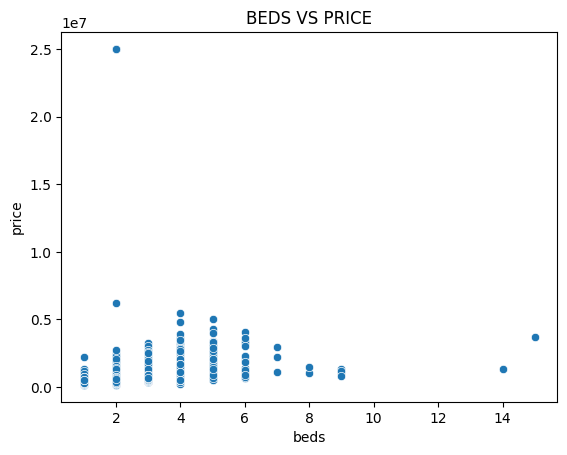

In [28]:
sns.scatterplot(x = 'beds',y = 'price',data = train)
plt.title('BEDS VS PRICE')
plt.show()

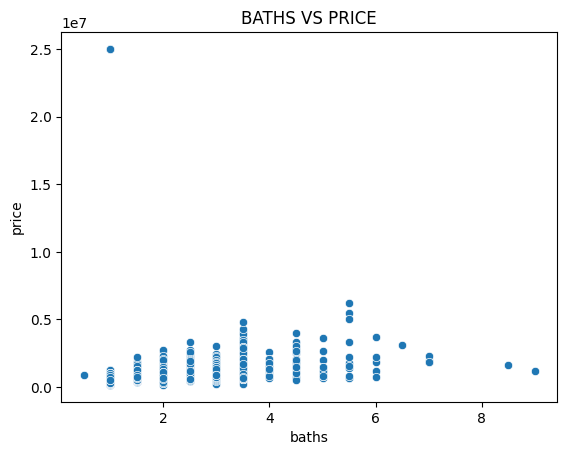

In [29]:
sns.scatterplot(x = 'baths', y = 'price', data = train)
plt.title('BATHS VS PRICE')
plt.show()

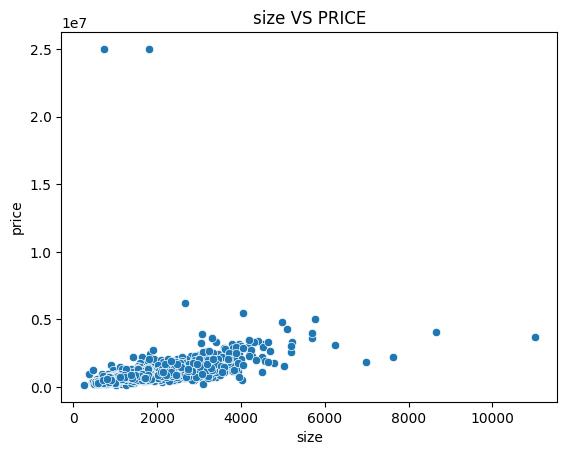

In [30]:
sns.scatterplot(x = 'size', y = 'price', data = train)
plt.title('size VS PRICE')
plt.show()

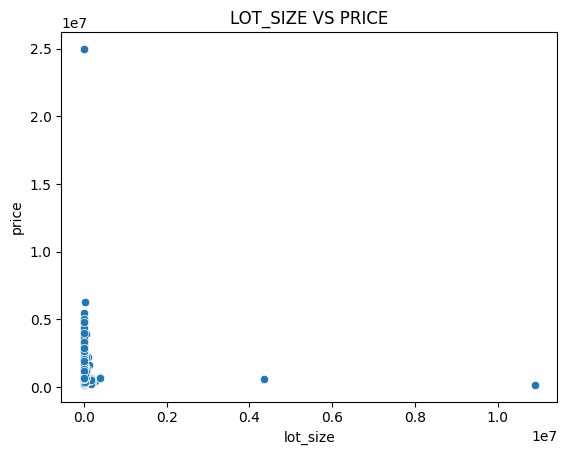

In [31]:
sns.scatterplot(x = 'lot_size', y = 'price', data = train)
plt.title('LOT_SIZE VS PRICE')
plt.show()

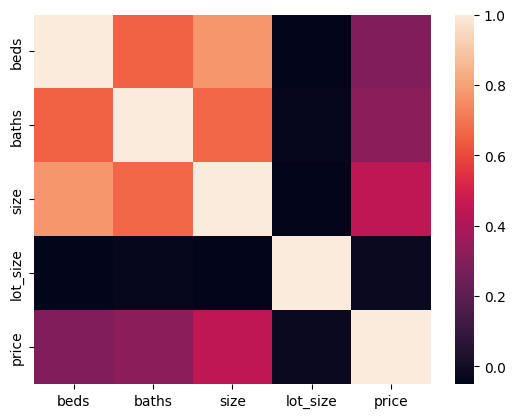

In [32]:
sns.heatmap(train.corr())
plt.show()

## Dividing data in X and y data frames

In [33]:
x_train = train.drop('price', axis = 1)
x_test = test.drop('price', axis = 1)

In [34]:
y_train = train['price']
y_test = test['price']

In [35]:
from sklearn.linear_model import LinearRegression
obj = LinearRegression()

In [36]:
obj.fit(x_train, y_train)

LinearRegression()

In [37]:
obj.coef_

array([-1.10383230e+05,  6.99832948e+04,  5.22203430e+02, -1.90801263e-02])

In [38]:
obj.intercept_

221042.79947310162

## OBJECT SCORE:

In [39]:
obj.score(x_test, y_test)

0.5335565706117253

## NOW WE WILL NORMALIZE THE DATA AND WILL CHECK THE SCORE AFTER NORMALIZING

In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply minmax scaling to the DataFrame
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

## OBJECT SCORE AFTER NORMALIZATION: 

In [41]:
from sklearn.linear_model import LinearRegression
obj1 = LinearRegression()

In [42]:
obj1.fit(x_train, y_train)

LinearRegression()

In [43]:
obj1.score(x_test, y_test)

0.5361354861385702

In [44]:
obj1.coef_

array([-138524.25177261,   70178.20718331,  480482.16331588,
         -5011.69053802])

In [45]:
obj1.intercept_


964070.0069755855

## EVALUATING USING MATRICES

In [46]:
y_pred = obj1.predict(x_test)

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [48]:
print(mean_absolute_error(y_test, y_pred))

250761.14703196986


In [49]:
print(mean_squared_error(y_test, y_pred))

171742165033.08292


In [50]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

414417.8628306011


In [51]:
print(r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

0.5361354861385702


In [52]:
x_test.shape

(504, 4)

In [53]:
adjusted_r2=1-((1-r2)*(504-1)/(504-1-4))
print(adjusted_r2)

0.5324171333220458


## MODEL MAKING USING POLYNOMIAL REGRESSION: 

In [54]:

from sklearn.preprocessing import PolynomialFeatures
x_train = train.drop('price', axis = 1)
x_test = test.drop('price', axis = 1)
y_train = train['price']
y_test = test['price']


In [55]:
poly = PolynomialFeatures(degree = 2)

In [56]:
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [57]:
obj3 = LinearRegression()

In [58]:
obj3.fit(x_poly_train, y_train)

LinearRegression()

In [59]:
obj3.score(x_poly_test, y_test)

0.5403427025218851

## EVALUATING USING MATRICES

In [60]:
y_pred = obj3.predict(x_poly_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MEAN: ",mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED",mean_squared_error(y_test, y_pred))
print("ROOT MEAN SQUARED: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 SCORE: ",r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('SHAPE: ',x_test.shape)
adjusted_r2=1-((1-r2)*(504-1)/(504-1-4))
print("ADJUSTED R2: ",adjusted_r2)

MEAN:  255380.74096293864
MEAN SQUARED 170184476464.8882
ROOT MEAN SQUARED:  412534.212478054
R2 SCORE:  0.5403427025218851
SHAPE:  (504, 4)
ADJUSTED R2:  0.53665807488679


## RIDGE REGRESSION:

In [61]:

x_train = train.drop('price', axis = 1)
x_test = test.drop('price', axis = 1)
y_train = train['price']
y_test = test['price']

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply minmax scaling to the DataFrame
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

from sklearn.linear_model import Ridge


In [62]:
obj4 = Ridge()

In [63]:
obj4.fit(x_train, y_train)

Ridge()

In [64]:
obj4.score(x_test, y_test)

0.5361666063262605

## EVALUATING USING MATRICES

In [65]:
y_pred = obj4.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MEAN: ",mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED",mean_squared_error(y_test, y_pred))
print("ROOT MEAN SQUARED: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 SCORE: ",r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('SHAPE: ',x_test.shape)
adjusted_r2=1-((1-r2)*(504-1)/(504-1-4))
print("ADJUSTED R2: ",adjusted_r2)

MEAN:  250692.62577126446
MEAN SQUARED 171730643029.88922
ROOT MEAN SQUARED:  414403.9611657799
R2 SCORE:  0.5361666063262605
SHAPE:  (504, 4)
ADJUSTED R2:  0.5324485029701583


## LASSO REGRESSION:

In [66]:
x_train = train.drop('price', axis = 1)
x_test = test.drop('price', axis = 1)
y_train = train['price']
y_test = test['price']

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply minmax scaling to the DataFrame
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

from sklearn.linear_model import Lasso

In [67]:
obj5 = Lasso()

In [68]:
obj5.fit(x_train, y_train)

Lasso()

In [69]:
obj5.score(x_test, y_test)

0.5361355172714831

## EVALUATING USING MATRICES:

In [70]:
y_pred = obj5.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MEAN: ",mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED",mean_squared_error(y_test, y_pred))
print("ROOT MEAN SQUARED: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 SCORE: ",r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('SHAPE: ',x_test.shape)
adjusted_r2=1-((1-r2)*(504-1)/(504-1-4))
print("ADJUSTED R2: ",adjusted_r2)

MEAN:  250760.9355912876
MEAN SQUARED 171742153506.36835
ROOT MEAN SQUARED:  414417.8489234849
R2 SCORE:  0.5361355172714831
SHAPE:  (504, 4)
ADJUSTED R2:  0.532417164704521
